Goal: Investigate possible relationship between Saratoga temperature change and strawberry crop yield in NY over 40 year period

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

Import Saratoga temperature and NY crop yield datasets. Clean data by excluding top csv rows containing metadata.

In [2]:
saratoga_temps=pd.read_csv('datasets/PRISM saratoga mean temp since 1895CSV.csv',delimiter=',')
strawberry_yield79=pd.read_csv('datasets/yield ny strawberries1970-79CSV.csv',delimiter=',')
strawberry_yield89=pd.read_csv('datasets/yield ny strawberries1980-1989CSV.csv',delimiter=',')
strawberry_yield90_12=pd.read_csv('datasets/yield ny strawberries1990-2012CSV.csv',delimiter=',')


saratoga_temps_df = pd.DataFrame(saratoga_temps)
strawberry_yield79_df = pd.DataFrame(strawberry_yield79)
strawberry_yield89_df = pd.DataFrame(strawberry_yield89)
strawberry_yield90_12_df = pd.DataFrame(strawberry_yield90_12)

saratoga_temps_df.columns = saratoga_temps_df.iloc[9]
saratoga_temps_df = saratoga_temps_df[10:]
saratoga_temps_df = saratoga_temps_df.reset_index(drop=True)
saratoga_temps_df = saratoga_temps_df.rename(columns={'tmean (degrees F)':'tmeanF','Date':'Year'})
#saratoga_temps_df.to_csv('datasets/US-Temperatures-CSV2.csv', index=False) 
#saratoga_temps_df.head()
#us_temperatures_df.shape[1]
saratoga_temps_df.head()

9,Year,tmeanF
0,1895,45.1
1,1896,45.1
2,1897,45.2
3,1898,47.1
4,1899,45.7


(did not use): Imported Saratoga minimum temperatures to possibly investigate recorded low temperature vs yield

In [3]:
saratoga_tmin=pd.read_csv('datasets/PRISM_tmin_saratoga70-12CSV.csv',delimiter=',')
saratoga_tmin_df = pd.DataFrame(saratoga_tmin)
saratoga_tmin_df.columns = saratoga_tmin_df.iloc[9]
saratoga_tmin_df = saratoga_tmin_df[10:]
saratoga_tmin_df = saratoga_tmin_df.reset_index(drop=True)
saratoga_tmin_df = saratoga_tmin_df.rename(columns={'tmin (degrees F)':'tminF','Date':'Year'})
saratoga_tmin_df.head()

9,Year,tminF
0,1970,33.3
1,1971,33.7
2,1972,33
3,1973,34.9
4,1974,32.6


(did not use): Imported Saratoga Vapor Pressure records to investigate possible relationship with yield

In [4]:
saratoga_maxvpd=pd.read_csv('datasets/PRISM_vpdmax_saratoga70-12CSV.csv',delimiter=',')
saratoga_maxvpd_df = pd.DataFrame(saratoga_maxvpd)
saratoga_maxvpd_df.columns = saratoga_maxvpd_df.iloc[9]
saratoga_maxvpd_df = saratoga_maxvpd_df[10:]
saratoga_maxvpd_df = saratoga_maxvpd_df.reset_index(drop=True)
saratoga_maxvpd_df = saratoga_maxvpd_df.rename(columns={'vpdmax (hPa)':'vpdmax','Date':'Year'})
saratoga_maxvpd_df.head()

9,Year,vpdmax
0,1970,9.63
1,1971,9.44
2,1972,8.62
3,1973,9.84
4,1974,9.01


(did not use): Imported Saratoga Precipitation records to investigate possible relationship with yield

In [5]:
saratoga_ppt=pd.read_csv('datasets/PRISM_ppt_saratoga70-12CSV.csv',delimiter=',')
saratoga_ppt_df = pd.DataFrame(saratoga_ppt)
saratoga_ppt_df.columns = saratoga_ppt_df.iloc[9]
saratoga_ppt_df = saratoga_ppt_df[10:]
saratoga_ppt_df = saratoga_ppt_df.reset_index(drop=True)
saratoga_ppt_df = saratoga_ppt_df.rename(columns={'ppt (inches)':'pptINCH','Date':'Year'})
saratoga_ppt_df.head()

9,Year,pptINCH
0,1970,37.57
1,1971,43.81
2,1972,53.65
3,1973,44
4,1974,43.22


Cleaned 3 separate datasets containing strawberry yield information. Each csv is separated by year ranges: 1. 1970-79; 2. 1980-1989 and 3. 1990-2012. 

In [6]:
strawberry_yield79_df.columns = strawberry_yield79_df.iloc[0]
strawberry_yield79_df= strawberry_yield79_df[0:]
strawberry_yield79_df = strawberry_yield79_df.rename(columns={'Item':'State'})

strawberry_yield89_df.columns = strawberry_yield89_df.iloc[0]
strawberry_yield89_df = strawberry_yield89_df[0:]
strawberry_yield89_df = strawberry_yield89_df.rename(columns={'Item':'State'})
#strawberry_yield89_df
#strawberry_yield90_12_df
strawberry_yield90_12_df.columns = strawberry_yield90_12_df.iloc[0]
strawberry_yield90_12_df = strawberry_yield90_12_df[0:]
strawberry_yield90_12_df = strawberry_yield90_12_df.rename(columns={'Item':'State','2012 2/':'2012'})
#strawberry_yield90_12_df

In [7]:
x = list(strawberry_yield79_df.columns.values)
y = list(strawberry_yield89_df.columns.values)
z = list(strawberry_yield90_12_df.columns.values)

#colnames.pop(0)
mergedlist = x + y + z

mergedlist.remove("State")
mergedlist.remove("State")
mergedlist.remove("State")



Create new dataframe to store new merged year list. To be used to merge with yield values.

In [8]:
colnames = pd.Series(mergedlist)
df_ny_strawberry = pd.DataFrame(columns=['Year','Yield'])
df_ny_strawberry['Year'] = colnames.values
#df_ny_strawberry['Yield'] = colnames.values
df_ny_strawberry.head()

,Year,Yield
0,1970,NaN
1,1971,NaN
2,1972,NaN
3,1973,NaN
4,1974,NaN


Transform dataframe on index of State. 
Rename column clean-up. 
Store selected one state (NY) 1970-1979 yield in a list

In [9]:
#strawberry_yield79_df[strawberry_yield79_df.State == "New York"]
#strawberry_yield79_df[strawberry_yield79_df[:,0]]
#grouped = strawberry_yield79_df.groupby("New York")
#grouped = strawberry_yield79_df.groupby(['State'])
#grouped
#' New York Yield'
sdf = strawberry_yield79_df.set_index('State').T
sdf = sdf.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_79 = []
yield_79= list(sdf["New_York_Yield"])
yield_79

['3.9', '3.5', '2.4', '4', '4.2', '4.1', '3.3', '4.3', '4.9', '5.5']

Store selected one state (NY) 1980-1989 yield in a list

In [10]:
sdf_89 = strawberry_yield89_df.set_index('State').T
sdf_89 = sdf_89.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_89 = []
yield_89 = list(sdf_89["New_York_Yield"])
yield_89

['5.3', '4.6', '4.5', '4.5', '5.1', '5.1', '5.5', '5.7', '4.8', '5.6']

Store selected one state (NY) 1990-2012 yield in a list

In [11]:
sdf_12 = strawberry_yield90_12_df.set_index('State').T
sdf_12 = sdf_12.rename(columns={'    New York Yield':'New_York_Yield'})
#sdf2 = sdf['    New York Yield']
#sdf2
#sdf
yield_12 = []
yield_12 = list(sdf_12["New_York_Yield"])


Merge yield lists into 1 list to house 1970-2012 NY yield values

In [12]:
yield_79_12 = yield_79 + yield_89 + yield_12

Merge yield values with year dataframe

In [13]:
colnames = pd.Series(mergedlist)
df_ny_strawberry = pd.DataFrame(columns=['Year','Yield'])
df_ny_strawberry['Year'] = colnames.values
df_ny_strawberry['Yield'] = yield_79_12
df_ny_strawberry.head()

,Year,Yield
0,1970,3.9
1,1971,3.5
2,1972,2.4
3,1973,4
4,1974,4.2


Merge Saratoga temperature minimum values with year dataframe

In [14]:
newdf= pd.merge(df_ny_strawberry, saratoga_tmin_df, on='Year', how='inner')
newdf.head()

,Year,Yield,tminF
0,1970,3.9,33.3
1,1971,3.5,33.7
2,1972,2.4,33
3,1973,4,34.9
4,1974,4.2,32.6


Merge Saratoga temperature averages; Vapor PD and preciptitation values with Year dataframe

In [15]:
newdf2 = pd.merge(newdf, saratoga_temps_df, on='Year', how='inner')
newdf2
newdf3 = pd.merge(newdf2,saratoga_maxvpd_df,on='Year', how='inner')
newdf3
newdf4 = pd.merge(newdf3,saratoga_ppt_df,on='Year', how='inner')
newdf4.head()

,Year,Yield,tminF,tmeanF,vpdmax,pptINCH
0,1970,3.9,33.3,44.5,9.63,37.57
1,1971,3.5,33.7,44.9,9.44,43.81
2,1972,2.4,33,43.7,8.62,53.65
3,1973,4,34.9,46.4,9.84,44
4,1974,4.2,32.6,44.1,9.01,43.22


Convert values to integers

In [16]:
newdf4['Yield'] = pd.to_numeric(newdf4['Yield'])
newdf4['tminF'] = pd.to_numeric(newdf4['tminF'])
newdf4['tmeanF'] = pd.to_numeric(newdf4['tmeanF'])


Plot NY strawberry crop yield and Saratoga, NY average temperatures using twin axes

<IPython.core.display.Javascript object>


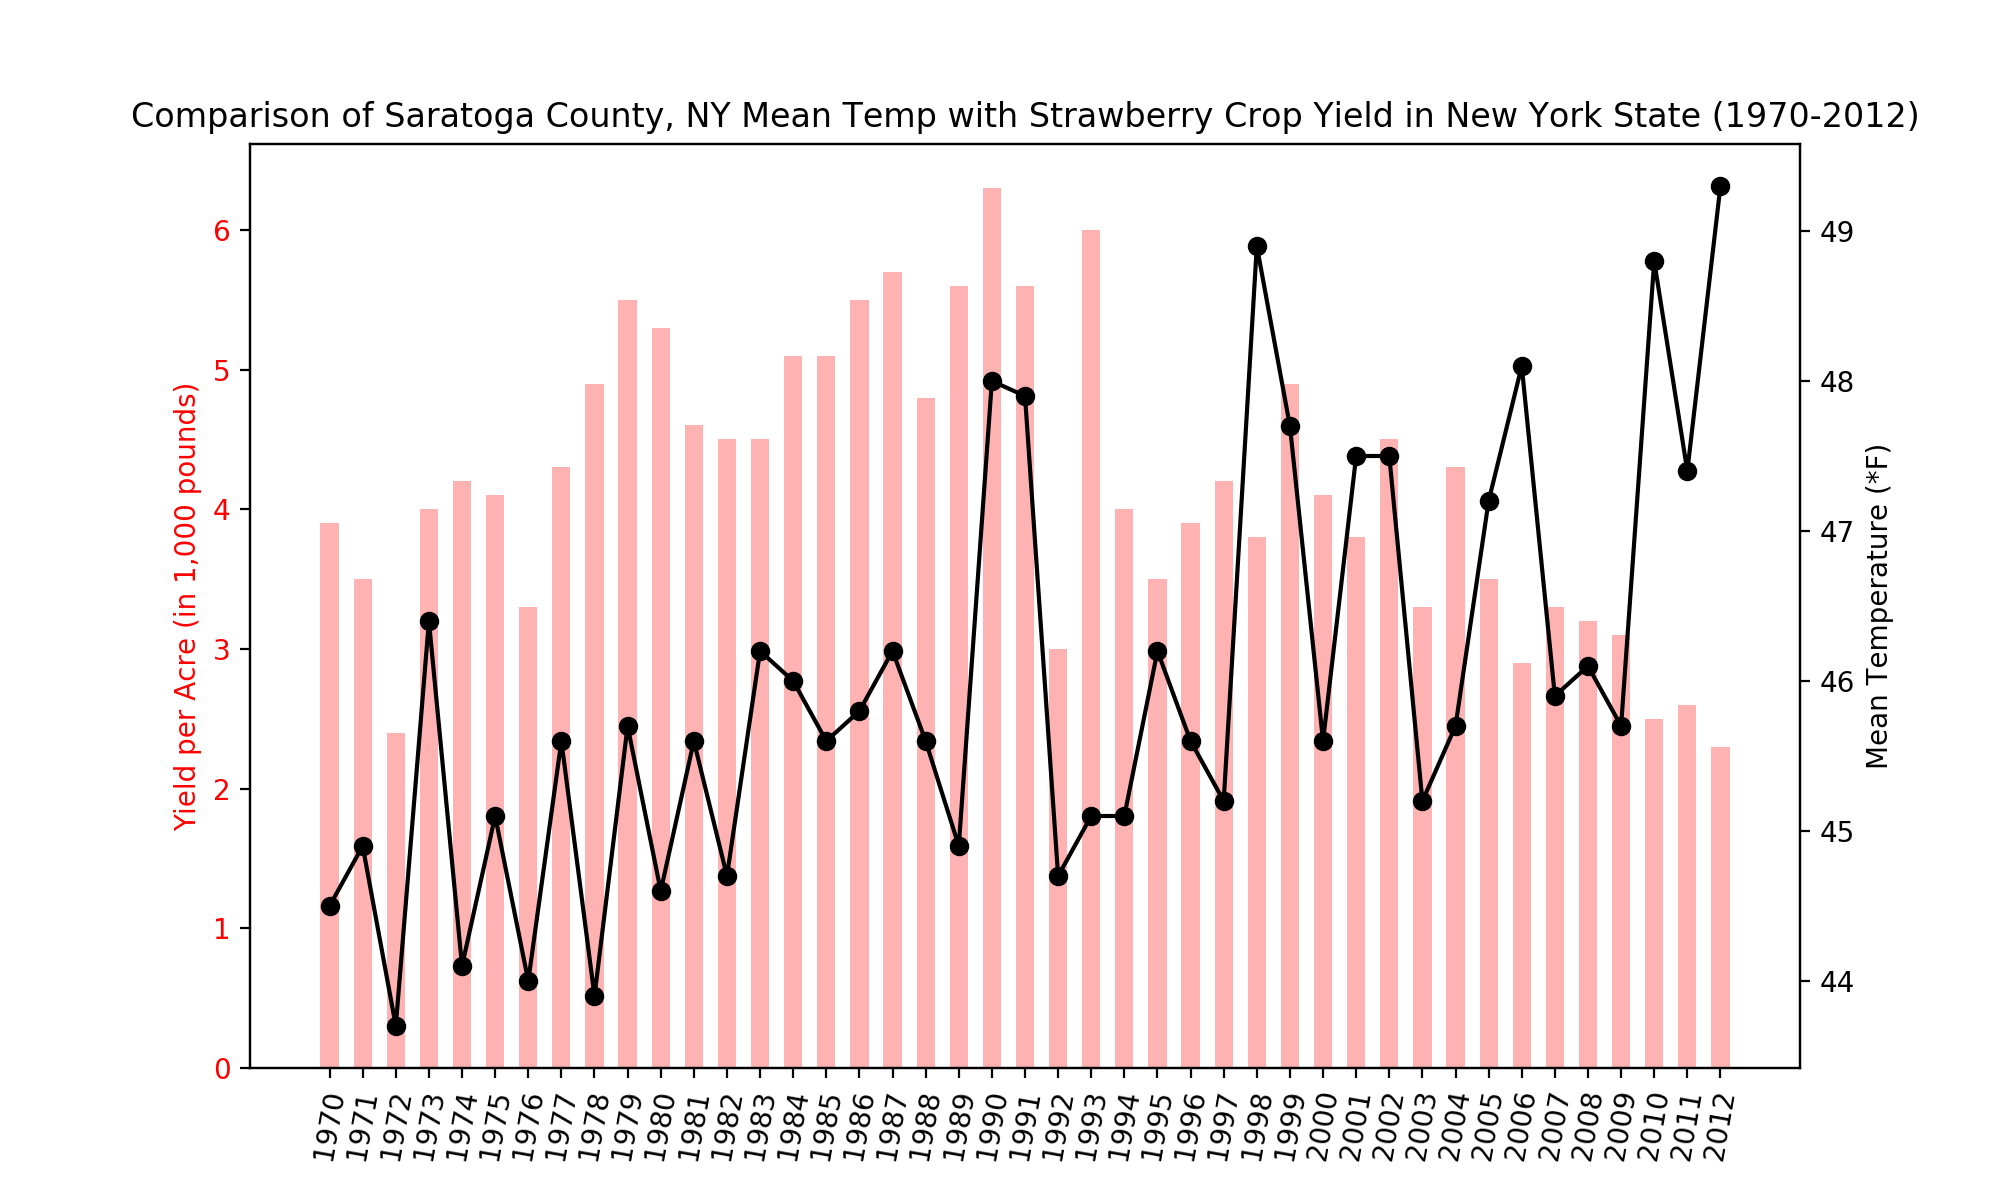

In [17]:
x2=newdf4['Year']
y1=newdf4['Yield']
y2=newdf4['tmeanF']

width = .55

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.bar(x2, y1,width = width,alpha=0.3, color='red')
ax1.set_ylabel('Yield per Acre (in 1,000 pounds)', color='red')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'black',marker='o')
ax2.set_ylabel('Mean Temperature (*F)', color='black')
for tl in ax1.get_yticklabels():
    tl.set_color('red')
for tl in ax2.get_yticklabels():
    tl.set_color('black')
#http://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
ax1.tick_params(axis='x', rotation=80)
plt.xlabel('Year')
plt.title('Comparison of Saratoga County, NY Mean Temp with Strawberry Crop Yield in New York State (1970-2012)')
plt.savefig('Charts/Comparison_Temp_StrwYield_Saratoga-LIVE.png')
